In [1]:
import os
import time
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import shap
import lime

SEED = 42

/home/alexandre/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#1.1.1
MNIST = sklearn.datasets.load_digits()
MNIST_train_x , MNIST_test_x, MNIST_train_y, MNIST_test_y = sklearn.model_selection.train_test_split(MNIST["data"], MNIST["target"], random_state=SEED)


precisition weighted : 0.971392467129592


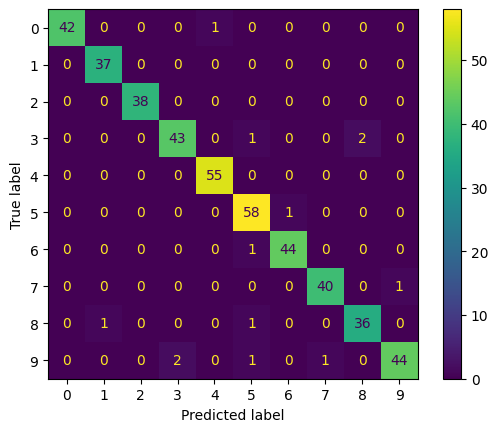

In [3]:
#1.1.2
random_forest_model = sklearn.ensemble.RandomForestClassifier(random_state=SEED)
random_forest_model.fit(MNIST_train_x, MNIST_train_y)
predicition = random_forest_model.predict(MNIST_test_x)
confusus_matrix = sklearn.metrics.confusion_matrix(MNIST_test_y, predicition)
disp = sklearn.metrics.ConfusionMatrixDisplay(confusus_matrix)
precision = sklearn.metrics.precision_score(MNIST_test_y, predicition, average='weighted')
print("precisition weighted :",precision)
disp.plot()

Il y a tres peu d'erreur, la précision est trés bonne donc le modèle est bon.

In [15]:
#1.2.3
import sklearn.datasets


true_6 = None
false_6 = None
for i in range(len(predicition)):
    if true_6 is None and MNIST_test_y[i] == 6 and predicition[i] == 6:
        true_6 = i
        if false_6 is not None:
            break
    if false_6 is None and MNIST_test_y[i] != 6 and predicition[i] == 6:
        false_6 = i
        if true_6 is not None:
            break

print("true 6 :", true_6, "\nfalse 6:", false_6)

for a in MNIST:
    print(a)

print(MNIST.images[0])
#print(MNIST_test_x[0].reshape(8,8))
#shap_explain = shap.TreeExplainer(random_forest_model).shap_values(MNIST_test_x[true_6])
shap_value = shap.Explainer(random_forest_model).shap_values(MNIST_test_x[0].reshape(8,8))     
#shap.image_plot([MNIST_test_x[0].reshape(8,8)])


true 6 : 0 
false 6: 339
data
target
frame
feature_names
target_names
images
DESCR
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
